# Final Project: Solving Issues in an Edutech Institution 

- Name: Hanuga Fathur Chaerulisma
- Email: hanugafc@gmail.com
- Id Dicoding:hanugafc

## Preparation 

### Import Required Libraries
In this step, it is the process for importing all necessary libraries for data manipulation, visualization, exporting data, machine learning modeling, evaluation, and prototyping using streamlit.

In [28]:
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn streamlit sqlalchemy python-dotenv psycopg2-binary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 142.3 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for psycopg2-binary: filename=psycopg2_binary-2.9.10-cp39-cp39-macosx_10_9_universal2.whl size=242150 sha256=64126c940db476f24eb01c886358feecd3556980ddd9b707e327a50a5f2f4d11
  Stored in directory: /Users/macbookpro/Library/Caches/pip/wheels/b3/78/4b/26baded4713ddbdca47cb9dcdab88aae8371bdcda44f9e07eb
Successfully built psycopg2-binary

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


Export installed packages to requirements.txt

In [29]:
!pip freeze > requirements.txt

import the necessary Python packages for data handling, visualization, modeling, and evaluation.

In [7]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import joblib # Save the model

# Library for exporting data
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style='whitegrid')

### Data Preparation

Load the data directly from a public GitHub repository.

In [8]:
# URL to the raw dataset
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"

# Load the dataset
df = pd.read_csv(url, sep=';')

# Display the first five rows
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

### Data Exploration
In this section, perform initial data exploration to understand the structure and contents of the dataset. This includes checking the shape, data types, missing values, and the distribution of the target variable.


In [9]:
# Check number of rows and columns
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Overview of column data types and non-null values
df.info()

# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("\nMissing values found:\n")
print(missing_values if not missing_values.empty else "No missing values found.")

# Quick descriptive statistics
df.describe()

Dataset contains 4424 rows and 37 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualificatio

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


According to the data exploration:
- The dataset consists of **4424 rows** and **37 columns**.
- All columns are **no missing values**.
- Most columns are **numeric** (either integer or float), with one categorical target variable: `Status`.
- The target variable `Status` includes three possible values: `Dropout`, `Graduate`, and `Enrolled`.

### Exploratory Data Analysis (EDA)

#### Univariate Analysis
The univariate analysis focuses on the target variable `Status`, which represents the final outcome of the student: `Graduate`, `Dropout`, or `Enrolled`. This analysis will help us understand the distribution of these categories.

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Percentage Distribution:
Status
Graduate    49.93
Dropout     32.12
Enrolled    17.95
Name: count, dtype: float64


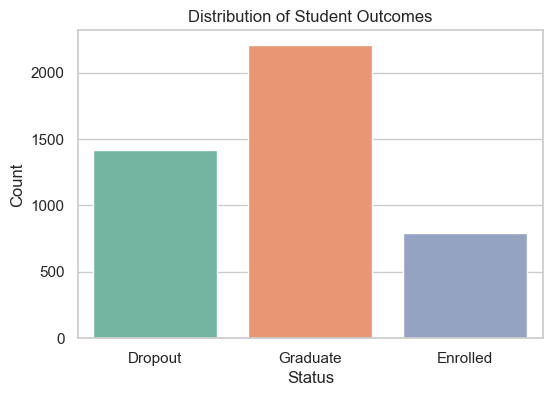

In [10]:
# Count the occurrences of each category in the target variable
status_counts = df['Status'].value_counts()
print(status_counts)

print("\nPercentage Distribution:")
print((status_counts / len(df) * 100).round(2))

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Status', palette='Set2')
plt.title('Distribution of Student Outcomes')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

Based on the class distribution:
- 2,209 students (49.93%) graduated,
- 1,421 students (32.12%) dropped out, and
- 794 students (17.95%) were still enrolled.

This distribution indicates a noticeable class imbalance, with nearly half of the students completing their studies. The dropout rate is also significant for over 30% of the data. Such imbalance should be addressed during model development to avoid biased predictions.

#### Bivariate Analysis
This section explores the relationship between selected features and the target variable `Status`. The features are grouped into three categories: financial factors, academic performance, and demographic attributes.

1. Academic Performance vs. Status
Academic variables such as `Admission_grade` and the average grade of the first semester are expected to influence whether students drop out, graduate, or remain enrolled.

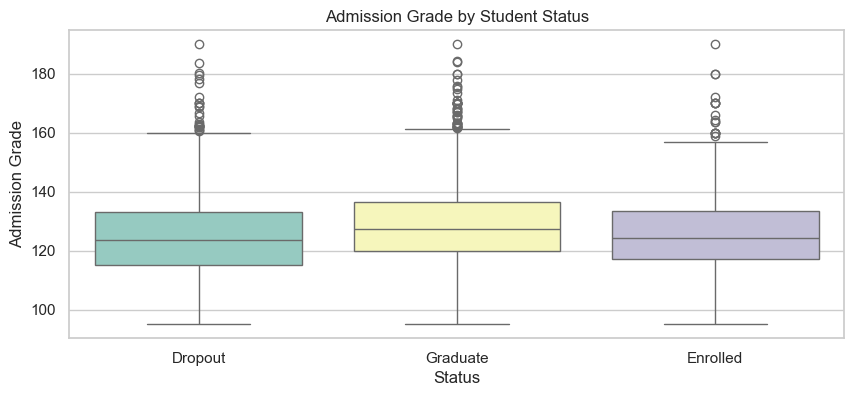

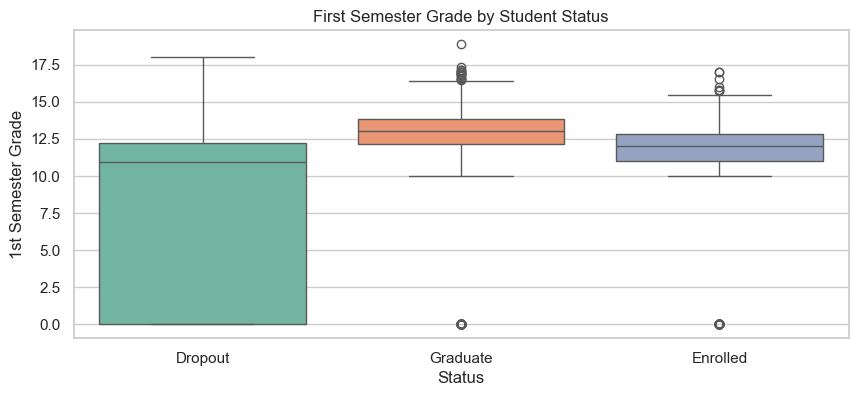

In [11]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Status', y='Admission_grade', data=df, palette='Set3')
plt.title('Admission Grade by Student Status')
plt.ylabel('Admission Grade')
plt.xlabel('Status')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x='Status', y='Curricular_units_1st_sem_grade', data=df, palette='Set2')
plt.title('First Semester Grade by Student Status')
plt.ylabel('1st Semester Grade')
plt.xlabel('Status')
plt.show()

Acknowledgment:
1. The boxplot of `Admission_grade` shows that Graduated students tend to have higher admission grades than those who dropped out or are still enrolled.
2. The boxplot of `Curricular_units_1st_sem_grade` show that first semester grades show a clear distinction: graduates generally have higher and more consistent grades, while dropouts exhibit lower and more dispersed scores. This suggests that early academic performance is a strong indicator of dropout risk.

2. Financial Factors vs. Status
Financial conditions may significantly impact dropout likelihood. This analysis considers scholarship ownership, tuition payment status, and debt status.

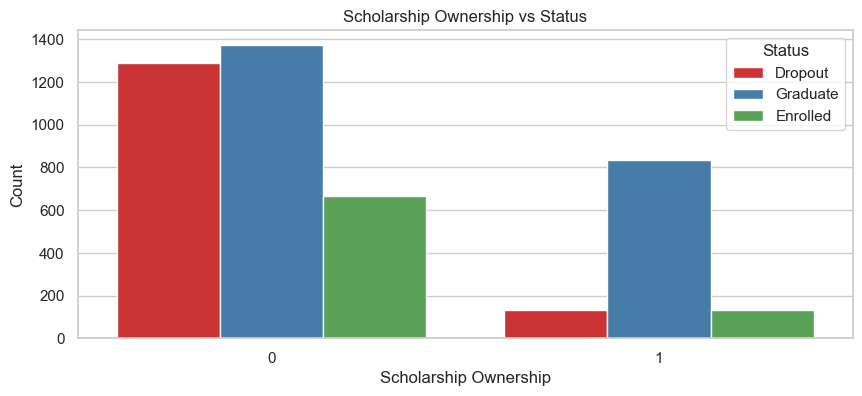

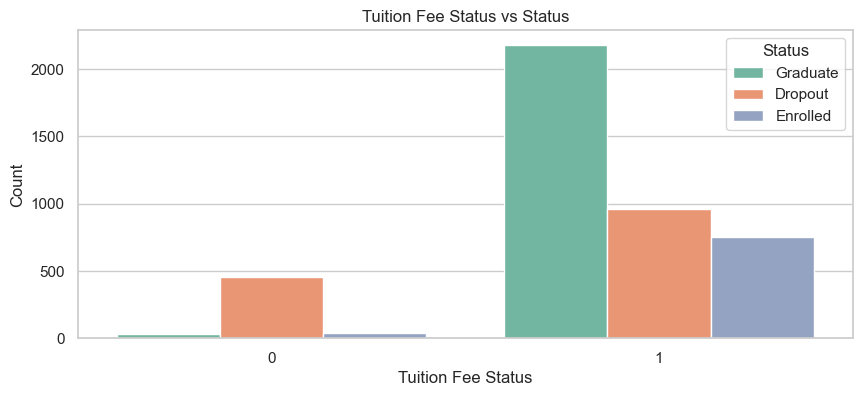

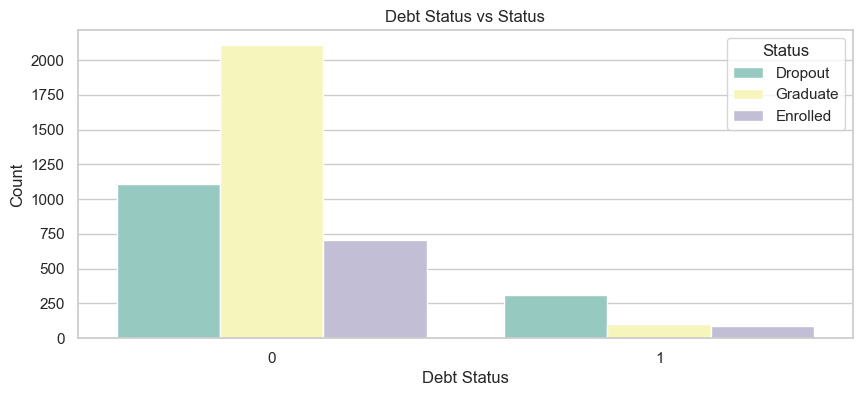

In [12]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Scholarship_holder', hue='Status', data=df, palette='Set1')
plt.title('Scholarship Ownership vs Status')
plt.ylabel('Count')
plt.xlabel('Scholarship Ownership')
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(x='Tuition_fees_up_to_date', hue='Status', data=df, palette='Set2')
plt.title('Tuition Fee Status vs Status')
plt.ylabel('Count')
plt.xlabel('Tuition Fee Status')
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(x='Debtor', hue='Status', data=df, palette='Set3')
plt.title('Debt Status vs Status')
plt.ylabel('Count')
plt.xlabel('Debt Status')
plt.show()

Acknowledgment:
1. Based of `Scholarship Ownership` shows that students with scholarships are more likely to graduate than those without. This suggests that financial support may positively influence academic success.
2. The `Tuition Fee Status` shows that students who had their tuition fees up to date were far more likely to graduate. In contrast, late or unpaid tuition fees were more common among students who dropped out. This suggests that financial stability plays a significant role in educational outcomes.
3. The `Debt Status` shows that Dropout cases were notably higher among students with outstanding debt. Rather, most graduates had no debt recorded. This further reinforces the link between financial hardship and dropout risk.

3. Demographic Factors vs. Status
Demographic factors such as gender, age at enrollment, and displaced status may also correlate with student outcomes.

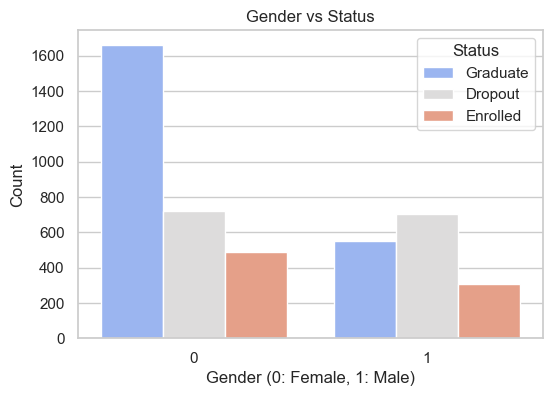

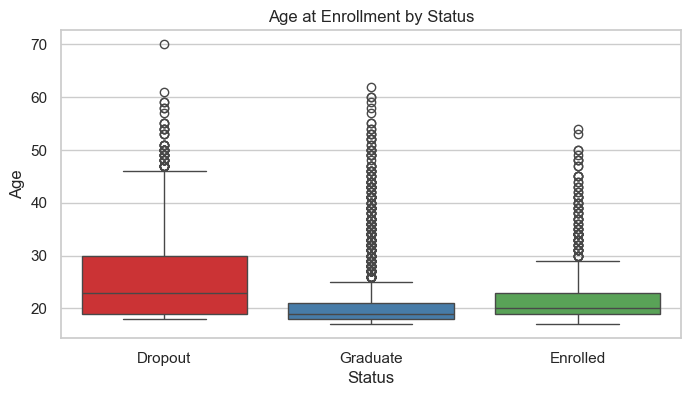

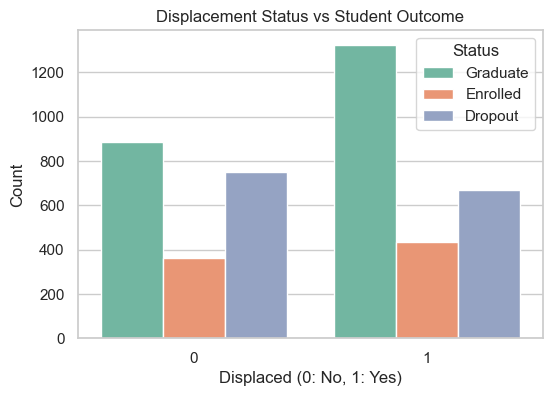

In [13]:
# Gender vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', hue='Status', data=df, palette='coolwarm')
plt.title('Gender vs Status')
plt.xlabel('Gender (0: Female, 1: Male)')
plt.ylabel('Count')
plt.show()

# Age distribution by status
plt.figure(figsize=(8, 4))
sns.boxplot(x='Status', y='Age_at_enrollment', data=df, palette='Set1')
plt.title('Age at Enrollment by Status')
plt.ylabel('Age')
plt.xlabel('Status')
plt.show()

# Displaced vs Status
plt.figure(figsize=(6, 4))
sns.countplot(x='Displaced', hue='Status', data=df, palette='Set2')
plt.title('Displacement Status vs Student Outcome')
plt.xlabel('Displaced (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()


Acknowledgment:
1. The `Gender` distribution shows that Female students have a higher graduation rate compared to male students, while male students exhibit slightly higher dropout counts. This suggests that gender may influence student outcomes, with females performing slightly better in terms of completion.
2. The `Age at Enrollment` boxplot indicates that younger students tend to have better outcomes, with graduates generally being younger than dropouts or those still enrolled. This suggests that age may play a role in academic success.
3. The `Displaced` status shows that Displaced students (those studying away from home) are more likely to graduate than those who are not displaced. However, dropout counts remain high in both categories, indicating that displacement alone does not guarantee academic success but may be associated with higher motivation or access to support systems.

### Correlation Analysis
This correlation matrix shows the linear relationships between numerical features in the dataset. Strong positive or negative correlations may indicate influence on the target.

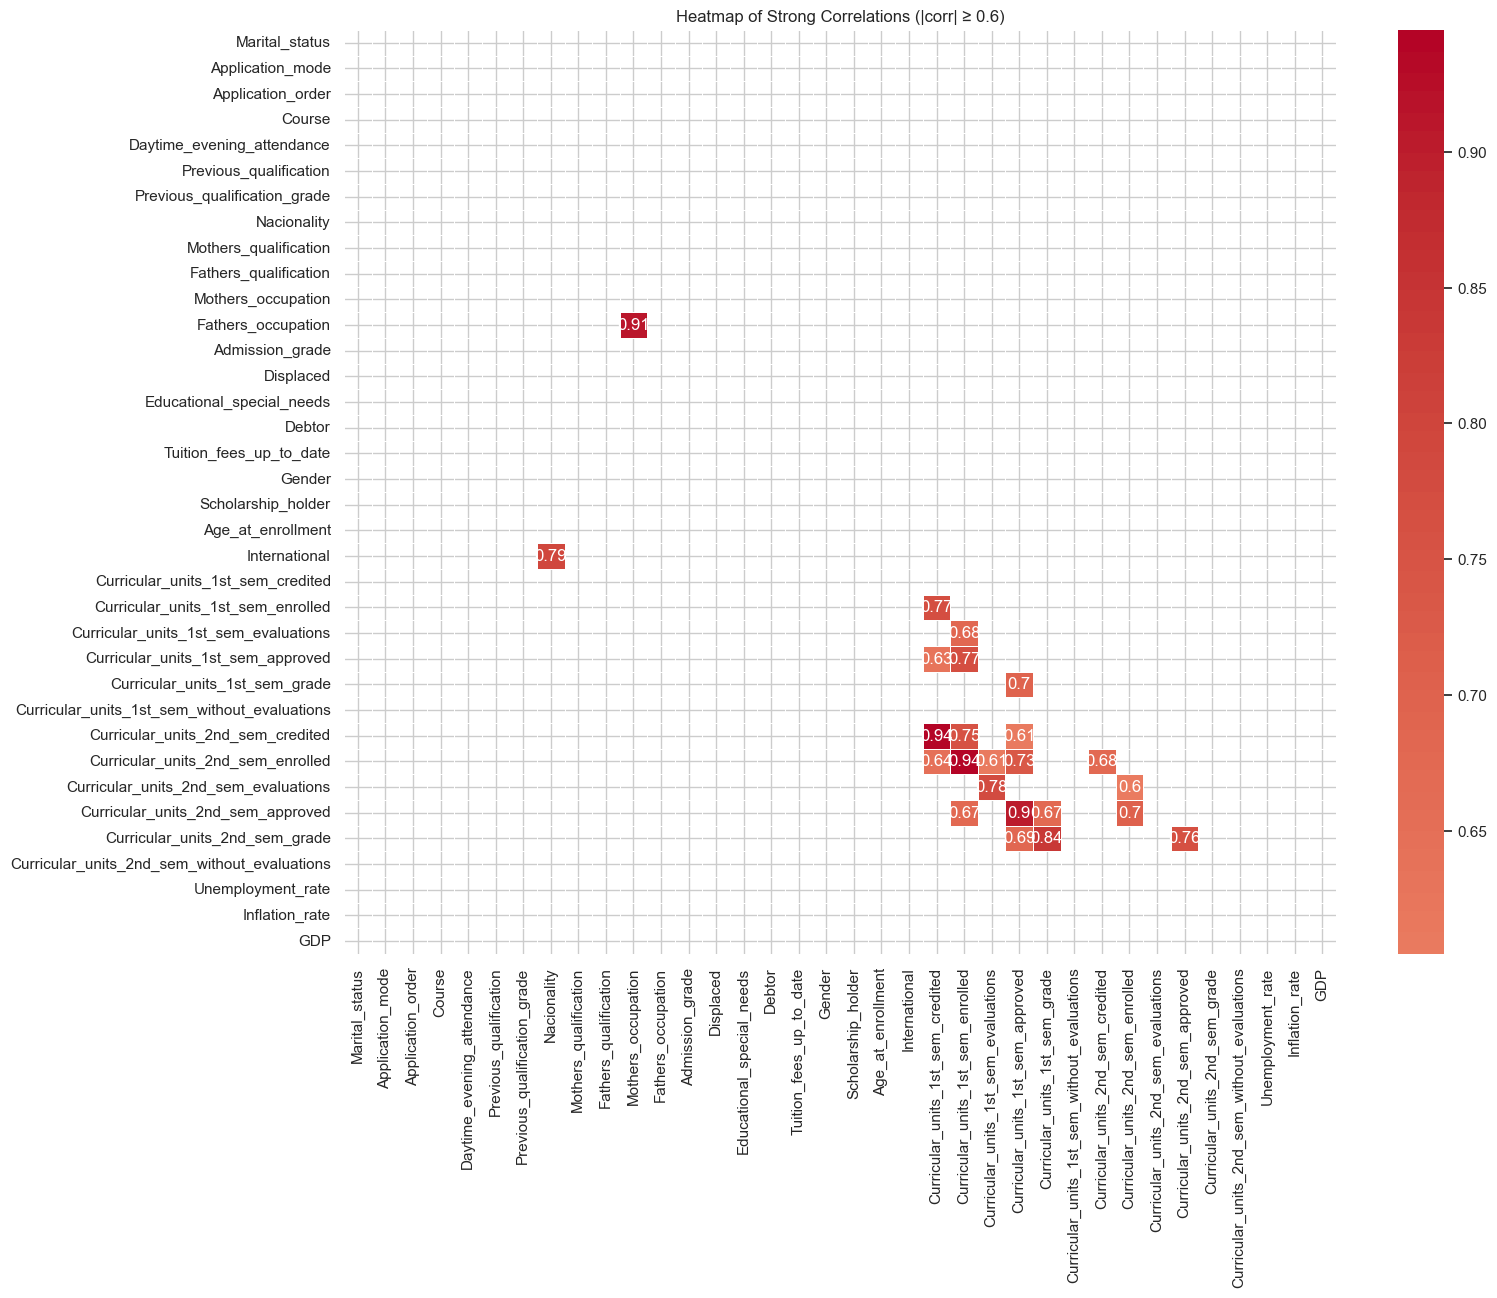

In [14]:
# Select only numerical columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the full correlation matrix
corr_matrix = numeric_df.corr()

# Mask the upper triangle for better readability
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set a threshold for "strong" correlation
threshold = 0.6
strong_corr = corr_matrix[(abs(corr_matrix) >= threshold) & (abs(corr_matrix) < 1)]

# Visualize with a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(strong_corr, mask=mask, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Heatmap of Strong Correlations (|corr| ≥ 0.6)')
plt.show()

Key Correlation Insights:
1. Academic Consistency
→ Students who earn credits in the 1st semester almost always continue doing well in the 2nd semester. This suggests academic consistency across terms.
→ High enrollment correlation shows students tend to maintain a similar course load across semesters.
→ Approval rates follow the same trend, implying performance is not just about effort but also about capability or support systems.
→ Students who achieve high grades in the 1st semester generally continue excelling, while those who struggle, keep struggling.
→ Number of evaluations is also similar, meaning engagement levels remain stable.

2. Mother’s and Father’s Occupation 
→ High correlation here indicates parents often share similar economic or social roles, which may shape the student's access to resources.

3. International and Nationality
→ A strong link suggests that being international is tightly associated with certain nationality labels in the dataset — this may affect dropout risk or academic adjustment.

## Data Preparation / Preprocessing
In this section, the dataset is prepared for modeling. This includes:
1. **Cleaning the Target Variable**: Removing irrelevant entries from the target variable `Status`.
2. **Encoding Categorical Variables**: Converting categorical variables into numerical format using `LabelEncoder`.
3. **Feature Selection**: Selecting the most relevant features for classification using `SelectKBest` and manual selection based on EDA insights.
4. **Standardization**: Standardizing the feature values to ensure all features contribute equally to the model's performance.
5. **Balancing Class Distribution**: Handling class imbalance using SMOTE (Synthetic Minority Over-sampling Technique).
6. **Splitting the Data**: Dividing the dataset into training and testing sets (80:20).

### Cleaning Target
The target variable `Status` is cleaned to remove any irrelevant entries. This ensures that the model is trained on accurate and relevant data.

In [15]:
# Drop row with status column 'Enrolled'
df = df[df['Status'] != 'Enrolled']

# Check the unique values in the 'Status' column
unique_status = df['Status'].unique()
print("Unique values in 'Status' column:", unique_status)

Unique values in 'Status' column: ['Dropout' 'Graduate']


Usage of LabelEncoder from sklearn to convert classes like 'Graduate', 'Dropout' into numbers,  this is essential for machine learning algorithms, which require numerical input.

### Encoding Categorical Variables

In [16]:
# Copy original dataframe to avoid modifying raw data
df_encoded = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Encode 'Status' column
df_encoded['Status'] = le.fit_transform(df_encoded['Status'])

# Check class mapping
class_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Class mapping:", class_mapping)

Class mapping: {'Dropout': np.int64(0), 'Graduate': np.int64(1)}


### Feature Selection
 SelectKBest is used to choose the most relevant features for classification.

In [17]:
# Separate features and target
X = df_encoded.drop(['Status'], axis=1)
y = df_encoded['Status']

# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=20)
X_new = selector.fit_transform(X, y)

# Get selected feature names
mask = selector.get_support()
selected_features = X.columns[mask]

print("Top 20 selected features:")
print(selected_features)

# Create new DataFrame with selected features
df_selected_kbest = df_encoded[selected_features.tolist() + ['Status']]

Top 20 selected features:
Index(['Marital_status', 'Application_mode', 'Application_order',
       'Daytime_evening_attendance', 'Previous_qualification_grade',
       'Admission_grade', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date',
       'Gender', 'Scholarship_holder', 'Age_at_enrollment',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_without_evaluations'],
      dtype='object')


Selecting features manual for early dropout prediction. This selection is based on the EDA and correlation analysis, focusing on features that are likely to influence student outcomes.

In [18]:
selected_features = [
    'Marital_status',
    'Application_order',
    'Admission_grade',
    'Displaced',
    'Debtor',
    'Gender',
    'Scholarship_holder',
    'Age_at_enrollment'
]


df_selected_manual = df_selected_kbest[selected_features + ['Status']]

print("Selected features:")
print(selected_features)

Selected features:
['Marital_status', 'Application_order', 'Admission_grade', 'Displaced', 'Debtor', 'Gender', 'Scholarship_holder', 'Age_at_enrollment']


### Standardization
Standardization is applied to ensure all features contribute equally to the model's performance. This is particularly important for algorithms sensitive to feature scales.

In [19]:
# Separate features and target
X = df_selected_manual.drop('Status', axis=1)
y = df_selected_manual['Status']

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check value
print("First 5 rows of standardized features:")
print(X_scaled[:5])

First 5 rows of standardized features:
[[-3.00685576e-01  2.43682250e+00  4.14846248e-04  9.06297309e-01
  -3.58302217e-01  1.38069731e+00 -6.03447443e-01 -4.42212114e-01]
 [-3.00685576e-01 -5.62470769e-01  1.04084924e+00  9.06297309e-01
  -3.58302217e-01  1.38069731e+00 -6.03447443e-01 -5.69976359e-01]
 [-3.00685576e-01  2.43682250e+00 -1.70709231e-01  9.06297309e-01
  -3.58302217e-01  1.38069731e+00 -6.03447443e-01 -5.69976359e-01]
 [-3.00685576e-01  1.87352548e-01 -5.26647312e-01  9.06297309e-01
  -3.58302217e-01 -7.24271709e-01 -6.03447443e-01 -4.42212114e-01]
 [ 1.33083706e+00 -5.62470769e-01  9.72399606e-01 -1.10339068e+00
  -3.58302217e-01 -7.24271709e-01 -6.03447443e-01  2.75189401e+00]]


### Balancing Class Distribution
Handle class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)

In [20]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({0: 2209, 1: 2209})


### Splitting the Data
Split the dataset into training and testing sets (80:20).

In [21]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print(f"Training set class distribution: {Counter(y_train)}")
print(f"Testing set class distribution: {Counter(y_test)}")

Training set size: 3534
Testing set size: 884
Training set class distribution: Counter({0: 1767, 1: 1767})
Testing set class distribution: Counter({0: 442, 1: 442})


## Modeling
The RandomForestClassifier creates an ensemble of decision trees to enhance prediction accuracy and reduce overfitting, with random_state=42 ensuring consistent results and class_weight='balanced' addressing class imbalance. RandomizedSearchCV is used to efficiently find the best hyperparameters by randomly sampling combinations from a defined parameter space. The best model, trained with optimized hyperparameters, is then evaluated for improved performance.

In [22]:
# Define the model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 500, 50),  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10, 15],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6],         # Minimum leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Apply bootstrap sampling
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, 
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

# Fit the model to find the best parameters
random_search.fit(X_resampled, y_resampled)

# Best parameters found by RandomizedSearchCV
print("Best parameters found by RandomizedSearchCV:")
print(random_search.best_params_)

# Best model from RandomizedSearchCV
best_rf_model_random = random_search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found by RandomizedSearchCV:
{'n_estimators': np.int64(400), 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}


## Evaluation
`classification_report` is a function to evaluate the performance of a classification model by providing detailed metrics for each class:
- Precision: Out of all predictions for a given class, how many were correct?
→ Precision = TP / (TP + FP)
- Recall (Sensitivity): Out of all actual instances of a class, how many did the model correctly identify?
→ Recall = TP / (TP + FN)
- F1-score: The harmonic mean of precision and recall; it balances the two.
→ F1 = 2 * (Precision * Recall) / (Precision + Recall)
- Support: The number of actual instances for each class in the dataset.

In [23]:
y_pred_random = best_rf_model_random.predict(X_resampled)
print(classification_report(y_resampled, y_pred_random))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2209
           1       0.87      0.87      0.87      2209

    accuracy                           0.87      4418
   macro avg       0.87      0.87      0.87      4418
weighted avg       0.87      0.87      0.87      4418



Based on the classification report: 
1. The model demonstrates balanced performance across both classes. Precision, recall, and F1-score for classes 0 and 1 are all 0.87, indicating that the model is equally effective at minimizing false positives and false negatives for both classes. 
2. The accuracy of 0.87 confirms that the model correctly predicted 87% of all test samples. With both macro and weighted averages also at 0.87, this shows that the model's performance is consistent regardless of class distribution. 

Overall, the model performs well and is reliable for predicting both classes.

`confusion_matrix` visualizes the performance of the classification model by showing the counts of true positive, true negative, false positive, and false negative predictions. This helps identify where the model is making errors.

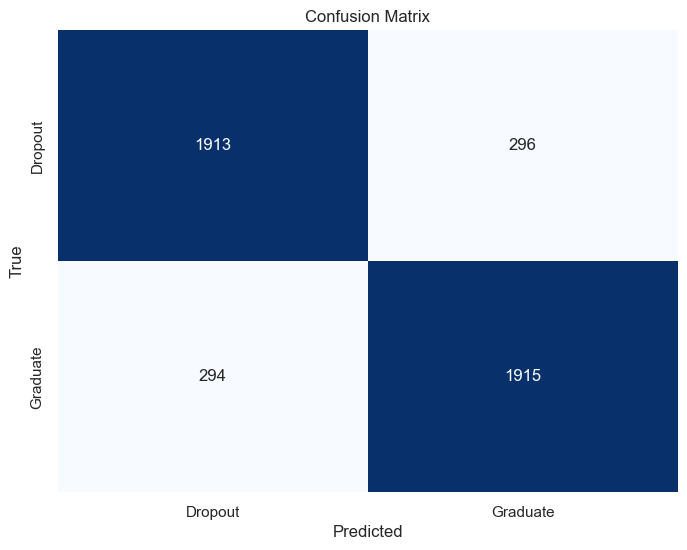

In [24]:
# # Confusion matrix
conf_matrix = confusion_matrix(y_resampled, y_pred_random)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The confusion matrix illustrates the model's performance in predicting student outcomes between two categories: Dropout and Graduate.

1. Dropout: 1,913 students were correctly predicted as Dropout, while 296 were incorrectly classified as Graduate.
2. Graduate: 1,915 students were correctly predicted as Graduate, while 294 were misclassified as Dropout.

Overall, the model shows balanced and high accuracy, correctly classifying the majority of students in both categories. However, there are still minor misclassifications on both sides, which could be critical when early identification of at-risk students (i.e., those likely to drop out) is essential for intervention.

## Save the Model
Save  Random Forest model, standard scaler, label encoder, and features using joblib.

In [25]:
# Save the trained model to a file
joblib.dump(best_rf_model_random, 'model.pkl')

# Save the scaler to a file
joblib.dump(scaler, 'scaler.pkl')

# Save the label encoder to a file
joblib.dump(le, 'label_encoder.pkl')

# Save the selected features (removing the 'Status' target)
selected_features = [feature for feature in selected_features if feature != 'Status']
joblib.dump(selected_features, 'features.pkl')

print("Model, scaler, label encoder, and features saved successfully.")

Model, scaler, label encoder, and features saved successfully.


## Export Cleaned Data
### Export to CSV
Export the cleaned dataset to a CSV file for future use.

In [26]:
# LabelEncoder status 
df_selected_manual['Status'] = le.inverse_transform(df_selected_manual['Status'])

# Save the cleaned dataset to a CSV file
df_selected_manual.to_csv('cleaned_data.csv', index=False)

print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


### Export to Database
Exporting clean data to database through library sqlalchemy 

In [30]:
# Load env file 
load_dotenv()

# Database connection parameters
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_name = os.getenv('DB_NAME')

# Create a database connection string
db_url = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"

# Create database engine using SQLAlchemy
engine = create_engine(db_url)

# Connection validation
try:
    with engine.connect() as connection:
        # Export DataFrame to database
        try:
            df_selected_manual.to_sql('students_performance', con=engine, if_exists='replace', index=False)
            print("Cleaned dataset exported to database successfully.")
        except Exception as export_error:
            print(f"Error exporting data to databse: {export_error}")
        
except Exception as e:
    print(f"Failed to connect with database: {e}")

Cleaned dataset exported to database successfully.
